# Proyecto sobre los precios de las casas en Boston

Puntos a tratar:
- Descripcion del dataset
- Analisis exploratorio
- Correlacion
- Multicolinealidad
- Analisis missing
- Ajuste del modelo
- Prueba de supuestos del modelo

## Cargar datos

In [65]:
# librerias
import pandas as pd
from sklearn.datasets import load_boston

In [66]:
# cargar datos
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/home/jbernal/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

De la descripcion de los datos vemos que hay 506 registros y 14 variables. Se suele utilizar como variable objetivo a *MEDV*. Los datos no contienen valores faltantes.

El objetivo es crear un modelo que prediga el Precio promedio de una casa *MEDV* segun algunas caracteristicas de la misma.

In [67]:
# variables predictoras en formato dataframe
X_orig = pd.DataFrame(boston.data, columns=boston.feature_names)
X_orig.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [68]:
# variable objetivo en formato de Serie
y_orig = pd.Series(boston.target, name='MEDV')
y_orig[0:5]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

## Datos de entrenamiento y de prueba

In [69]:
# librerias de visualizacion
# muestra el grafico debajo del codigo
%matplotlib inline  
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
# Libreria para dividir los datos
from sklearn.model_selection import train_test_split

In [71]:
# Creamos los dos conjuntos de datos
# divide los datos en 75% para entrenamiento y 25% para prueba
X_train, X_test, y_train, y_test = train_test_split(X_orig, y_orig, random_state=1)

In [72]:
# juntamos los datos entrenamiento en un datframe para futuros tratamientos
df = pd.concat([X_train, y_train], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
172,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69,23.1
80,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29,28.0
46,0.18836,0.0,6.91,0.0,0.448,5.786,33.3,5.1004,3.0,233.0,17.9,396.90,14.15,20.0
318,0.40202,0.0,9.90,0.0,0.544,6.382,67.2,3.5325,4.0,304.0,18.4,395.21,10.36,23.1


## EDA

**Los datos de entrenamiento contienen valores nulos?**

In [73]:
X_train.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [74]:
y_train.isna().sum()

0

No poseen valores faltantes

**Resumen estadistico de las variables predictoras**

In [75]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.805183,11.521108,11.220053,0.081794,0.554073,6.255726,68.751451,3.824433,9.525066,405.182058,18.478100,358.304802,12.936174
std,9.375846,23.492644,6.875362,0.274413,0.117825,0.687415,28.276504,2.138449,8.734550,169.483657,2.141433,89.601791,7.243381
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.083475,0.000000,5.255000,0.000000,0.447500,5.875000,45.050000,2.094450,4.000000,277.000000,17.400000,376.125000,7.165000
50%,0.245220,0.000000,9.690000,0.000000,0.538000,6.172000,79.200000,3.317500,5.000000,329.000000,19.100000,392.040000,11.970000
75%,3.683390,17.750000,18.100000,0.000000,0.624000,6.611000,94.050000,5.108550,24.000000,666.000000,20.200000,396.220000,17.135000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


- El promedio de la tasa de criminalidad es de 3.8, con una desviacion estandar de 9.37. Esta gran diferencia entre ambas metricas indican que los datos se encuentran muy dispersos. El valor minimo y maximo va de 0.006 a 88.9 lo que indica que hay zonas mucho mas seguras que otras.

- La distribucion de las zonas industriales tienen un comportamiento normal centrando gran parte de las zonas alrededor de la media.

- CHAS es una variable binaria e indica que el 8% de casas estan cercanas al rio. Como solo posee como valor cero y uno, al promediar nos da la proporcion de unos.

- La proporcion de casas ocupadas por los duenos

**Resumen estadistico de la variable objetivo**

In [76]:
y_train.describe()

count    379.000000
mean      22.344591
std        8.920931
min        5.000000
25%       17.100000
50%       20.800000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

- Indica que el promedio del precio de las casas es de 22.000 con un valor minimo y maximo de 5000 y 50.000 respectivamente

**Analisis de Correlacion**

Veamos la correlacion entre las variables predictoras

In [77]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.195484,0.389041,-0.064685,0.403533,-0.206140,0.348293,-0.370307,0.607924,0.570912,0.282849,-0.372070,0.442998
ZN,-0.195484,1.000000,-0.544895,-0.035765,-0.520324,0.336601,-0.588529,0.700130,-0.318524,-0.312923,-0.403056,0.169418,-0.420601
INDUS,0.389041,-0.544895,1.000000,0.036735,0.768276,-0.388148,0.646452,-0.713545,0.586062,0.704795,0.387252,-0.353812,0.598079
CHAS,-0.064685,-0.035765,0.036735,1.000000,0.098402,0.101530,0.067883,-0.092186,-0.009136,-0.044917,-0.119846,0.046263,-0.047730
NOX,0.403533,-0.520324,0.768276,0.098402,1.000000,-0.325283,0.726234,-0.764939,0.608815,0.670951,0.189482,-0.388886,0.598603
RM,-0.206140,0.336601,-0.388148,0.101530,-0.325283,1.000000,-0.286281,0.248623,-0.200272,-0.267035,-0.355134,0.136416,-0.611438
AGE,0.348293,-0.588529,0.646452,0.067883,0.726234,-0.286281,1.000000,-0.752379,0.456785,0.509776,0.278642,-0.290676,0.637677
DIS,-0.370307,0.700130,-0.713545,-0.092186,-0.764939,0.248623,-0.752379,1.000000,-0.490342,-0.537312,-0.241096,0.286775,-0.510071
RAD,0.607924,-0.318524,0.586062,-0.009136,0.608815,-0.200272,0.456785,-0.490342,1.000000,0.919322,0.465916,-0.442095,0.475813
TAX,0.570912,-0.312923,0.704795,-0.044917,0.670951,-0.267035,0.509776,-0.537312,0.919322,1.000000,0.464998,-0.439585,0.525850


- Hay una alta correlacion entre CRIM y RAD (60.7%).
- Hay una alta correlacion entre INDUS Y TAX (70.4%).
- Hay una alta correlacion entre TAX y RAD (91.9%).
- Notemos que los impuestos (TAX) estan muy correlacionado con las zonas industriales (INDUS) y con la distancia a las autopistas (RAD). Debemos investigar si existe colinealidad entre ellas para luego ser tratada.

Ahora vamos a visualizar la correlacion entre todas las variables mediante un mapa de calor

<AxesSubplot:>

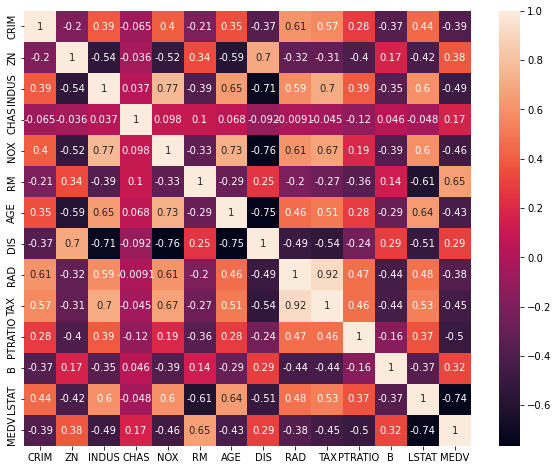

In [78]:
# mapa de calor
plt.figure(figsize=(10, 8)) 
sns.heatmap(df.corr(), annot=True)

Vemos una alta correlacion de la variable objetivo (Precio promedio de las casas MEDV) con:
- Las zonas industriales (INDUS) de -0.49.
- El estatus mas bajo de la poblacion (LSTAT). Tiene la mayor correlacion (de -0.74)
- La concentracion de oxido nitrico (NOX) de -0.46.
- El numero de habitaciones por vivienda (RM) de 0.65.

**Visualizacion de relaciones entre las variables**

Vamos a contrastar cada variable contra las demas para observar su comportamiento mediante graficas

In [79]:
#sns.pairplot(df)

Los graficos nos muestran que hay algunas variables con fuerte correlacion como son aquellas que presentan un comportamiento lineal. Nuestro interes radica en las relaciones con la variable objetivo MEDV. Podemos oservar un comportamiento lineal con  INDUS, RM, PTRATIO Y LSTAT

**Visualizacion de la Distribucion de variables predictoras**

En este caso no consideramos la variable CHAS ya que se trata de una variable binaria y la variable objetivo MEDV

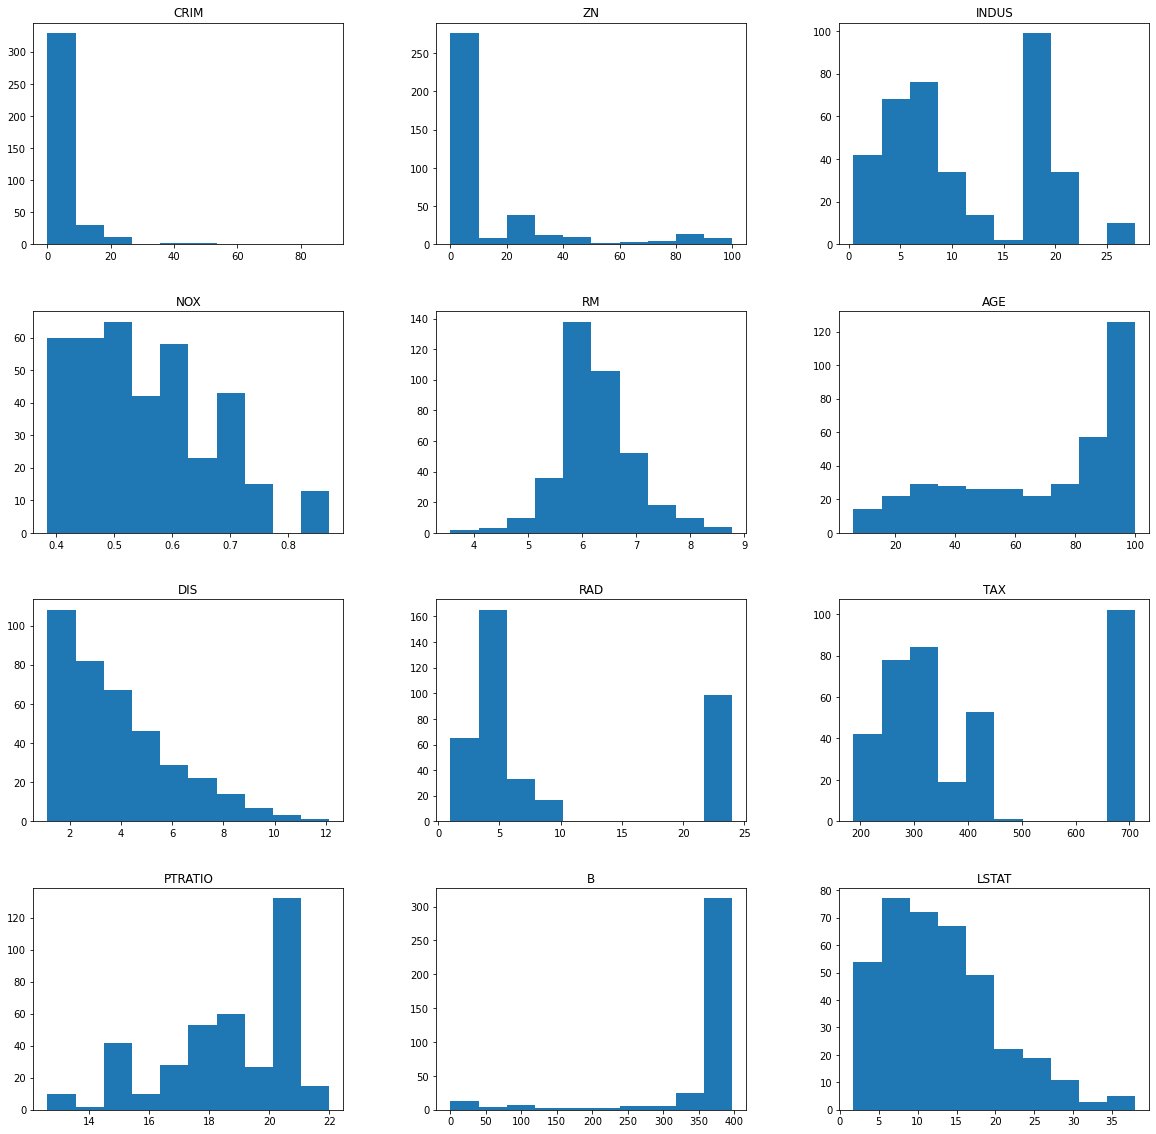

In [80]:
(df.drop(['CHAS', 'MEDV'], axis=1)).hist(figsize=(20, 20), layout=(4, 3), grid=False);

Reconozcamos aquellas variables que poseen una distribucion cercana a la normal ya que son mas faciles de implementar en el modelo.
- RM presenta un comportamiento cercano al normal
- ZN presenta valores extremos entre 60 y 100 lo cual podria afectar el rendimiento del modelo.
- B tambien presenta valores extremos entre 0 y 100
- LSTAT presenta mucho valores pequenos y pocos valores grandes decreciendo de forma continua

**Analisis de la variable Binaria**

Veamos como se comportan ambos grupos en funcion de MEDV

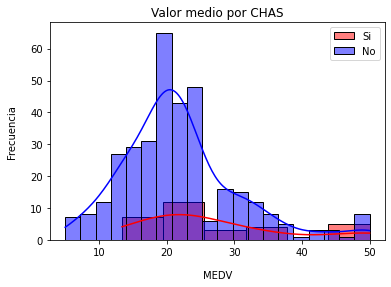

In [81]:
plt.figure(figsize=(6,4))

sns.histplot(y_train[X_train.CHAS==1], kde=True, label='Si', color='red')
sns.histplot(y_train[X_train.CHAS==0], kde=True, label='No', color='blue')

plt.xlabel('MEDV', labelpad=13)
plt.ylabel('Frecuencia', labelpad=13)

plt.title('Valor medio por CHAS')
plt.legend();

Vemos que las distribuciones de ambos grupos no presenta mayor diferencia respecto a MEDV. De esta forma concluimos que CHAS no es significativa para MEDV y no debe tomarse en cuenta para el modelo

**Visualizacion de la distribucion de la variable predictora**

<AxesSubplot:>

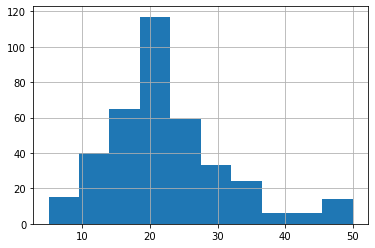

In [82]:
y_train.hist()

La ditribucion presenta valores extremos a partir de 40 lo cual podria afectar el modelo. Analicemos con mas detalles los valores extremo mediante un grafico de caja

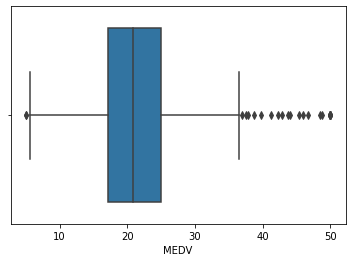

In [83]:
sns.boxplot(x=y_train);

El grafico claramente nos muestra valores extremos a partir de 38. Este conjunto de datos debe ser tratado o eliminado para que no afecte el ajuste del modelo

## Ajuste del Modelo Lineal

In [84]:
# trabajamos con la libreria statsmodel
import statsmodels.api as sm

Agrega una columna de unos a la matriz X_train para calcular el intercepto en el modelo de Regresion Lineal

In [85]:
X_constant = sm.add_constant(X_train)

Crea un modelo de regresion lineal ordinaria (OLS) pasandole la variable objetivo y la matriz de caracteristicas aumentada y luego se ajusta el modelo mediante fit()

In [86]:
lin_reg = sm.OLS(y_train, X_constant).fit()

Crea un resumen detallado del modelo

In [87]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     71.07
Date:                Wed, 15 May 2024   Prob (F-statistic):           1.72e-91
Time:                        11:59:38   Log-Likelihood:                -1127.6
No. Observations:                 379   AIC:                             2283.
Df Residuals:                     365   BIC:                             2338.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.1925      6.005      7.526      0.000      33.385      57.000
CRIM          -0.1144      0.035     -3.276      0.001      -0.183      -0.046
ZN             0.0571      0.017      3.332      0.001       0.023       0.091
INDUS          0.0383      0.071      0.540      0.590      -0.101       0.178
CHAS           2.4285      0.940      2.584      0.010       0.580       4.277
NOX          -21.2326      4.453     -4.768      0.000     -29.990     -12.476
RM             2.8772      0.497      5.786      0.000       1.899       3.855
AGE            0.0069      0.016      0.437      0.662      -0.024       0.038
DIS           -1.4716      0.240     -6.129      0.000      -1.944      -0.999
RAD            0.3058      0.081      3.758      0.000       0.146       0.466
TAX           -0.0107      0.005     -2.305      0.022      -0.020      -0.002
PTRATIO       -0.9961      0.159     -6.284      0.000      -1.308      -0.684
B              0.0063      0.003      1.950      0.052   -5.46e-05       0.013
LSTAT         -0.5574      0.059     -9.382      0.000      -0.674      -0.441
==============================================================================
Omnibus:                      149.481   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              669.903
Skew:                           1.668   Prob(JB):                    3.41e-146
Kurtosis:                       8.593   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Lo primero es verificar si el modelo es significativo. Para ello acudimos al valor de F-statistic el cual arroja un valor muy pequeno que esta por debajo del p-value(0.01) por tanto, decimos que el modelo es significativo.

- Para comparar modelos entre si, nos guiamos por los valores de AIC y BIC (Criterio de Informacion Akaike y Criterio de Informacion Bayesiano respectivamente). Mientras mas pequeno sea, mejor es el ajuste del modelo

- El R cuadrado indica la proporcion de variabilidad de la variable objetivo que es explicado por las variables predictoras. El resultado es que el 72% de los datos puede ser explicado por el modelo.

- Las variables con p-value menor a 0.05 son significativas para el modelo. En este caso, tenemos que las variables INDUS, AGE y B no son significativas al modelo. Recordemos que INDUS tiene una alta correlacion con TAX.

**Conceptos importantes**

1. AIC: es una medida de calidad del ajuste de un modelo que penaliza la complejidad del modelo. Cuanto menor sea, mejor se considera el ajuste del modelo. Se calcula de la siguiente manera:
    $
    AIC=−2×log(L)+2×k
    $
    - $L$ es la funcion de verosimilitud del modelo que mide la probabilidad de observar los datos dadas las estimaciones del modelo. 
    - $k$ es el numero de parametros estimados en el modelo
    
2. BIC: es similar a AIC pero utiliza una penalizacion mas fuerte para modelos con un mayor numero de parametros. Se calcula como sigue:
    
    $
    BIC=−2×log(L)+k×log(n)
    $
    - $n$ es el numero de observaciones en los datos
    
3. Los residuales son el grado de libertad y se calcula como sigue:
    $
    Residuales = Observaciones - N_parametros - 1
    $

## Evaluacion de los Supuestos del Modelo

Vamos a evaluar:
- La media de los residuales igual a cero
- La linealidad
- La independencia
- La normalidad
- La igualdad de varianza

### Media de los residuales

Para evaluar todos los supuestos, utilizamos los residuales que son la diferencia entre los valores esperados y los observados. El valor de todos los residuales debe ser cero o muy pequeno para asegurarnos que el modelo se ajusta bien a los datos.

In [88]:
# obtenemos los residuos del modelo
resid_val = lin_reg.resid

# obtenemos los valores de prediccion del modelo
predic_val = lin_reg.predict()

In [89]:
# Calculamos la media de los residuos
resid_val.mean()


1.9685220911559505e-15

A pesar que la media de los residuales es muy cercano a cero, este resultado puede ser engañoso debido a que el modelo puede sobreajustarse a los datos. No va a tener un valor predictivo fuerte frente a nuevos datos.

### Normalidad de los residuales y Prueba de Shapiro-Wilk

Para probar la normalidad de los residuales trazamos un grafico Q-Q y observamos su comportamiento

In [90]:
# importamos librerias
from scipy import stats

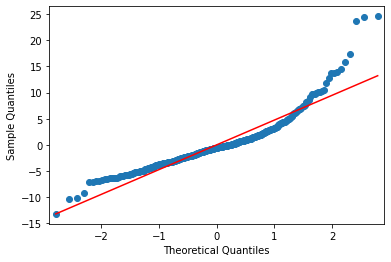

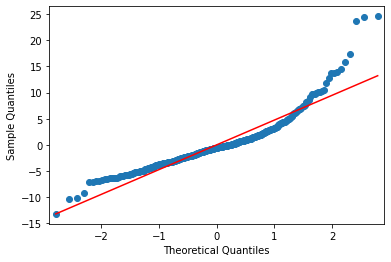

In [91]:
# grafico Q-Q
sm.qqplot(resid_val, line='s')

Vemos que los residuales no presentan mucha normalidad. Para comprobarlo vamos a utilizar el prueba Shapiro-Wilk

In [92]:
stats.shapiro(lin_reg.resid)

ShapiroResult(statistic=0.8845531940460205, pvalue=2.8586837868196523e-16)

Vemos que p-values es menor a 0.05 por tanto, rechazamos la hipotesis nula la cual indica que los residuos se distribuyen de manera normal. 

Este supuesto no es cumplido por los datos

### Linealidad

Se consigue analizando el comportamiento del grafico de dispersion entre los valores observados y los valores predichos. 

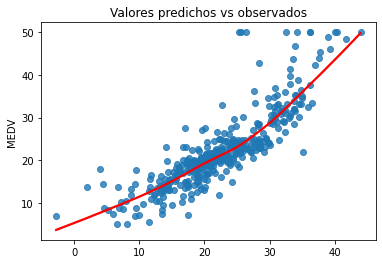

In [93]:
# regplot permite crear un grafico de dispersion con una linea de regresion ajustada
sns.regplot(x=predic_val, y=y_train, lowess=True, line_kws={'color':'red'})
plt.title('Valores predichos vs observados');

# lowess: indica que se debe ajustar una linea de regresion utilizando un suavizado local de minimos cuadrados
# line_kws: especifica el colo de la linea

Notamos que los valores extremos estan afectando la linealidad del modelo por tanto, deben ser tratados

### Igualdad de varianza: Homocedasticidad

Para evaluar la homocedasticidad, analizamos el comportamiento del grafico de dispersion entre los valores predichos y los residuales.

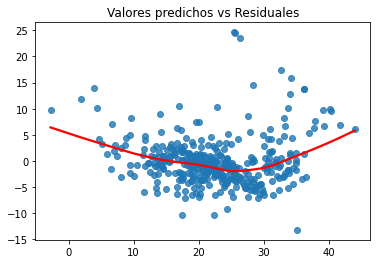

In [94]:
sns.regplot(x=predic_val, y=resid_val, lowess=True, line_kws={'color':'red'})
plt.title('Valores predichos vs Residuales');

Para mostrar que hay igualdad de varianza los datos no deben seguir ningun patron, deben estar distribuidos de manera homogenea alrededor del cero en un rango uniforme.

Dicho esto, vemos que la homogeneidad de los puntos en el rango de 0 a 15 es diferente a los puntos en el rango de 0 a -15.

Para mejorar la visualizacion, es recomendable utilizar los valores residuales estandarizados!

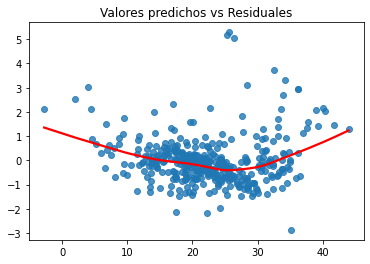

In [95]:
resid_stand = lin_reg.get_influence().resid_studentized_internal
# get.influence(): devuelve un objeto que proporciona informacion sobre la influencia de cada observacion en el ajuste del modelo
# resid_studentized_internal: devuelve los residuos estandarizados del modelo que sin una medida de cuanto se desvian los residuos de la media

sns.regplot(x=predic_val, y=resid_stand, lowess=True, line_kws={'color':'red'})
plt.title('Valores predichos vs Residuales');

Muestra mejor la diferencia entre ambos rangos, esta vez de 0 a 3 y de 0 a -3. Estos resultados indican que no se cumple la igualdad de varianza.

Para verlo explicitamente, utilizamos la prueba de Breush-Pagan la cual nos arroja un valor que indica si cumple o no con la homocedasticidad

In [96]:
import statsmodels as sms

BP_test = sms.stats.diagnostic.het_breuschpagan(resid_val, lin_reg.model.exog)

print(BP_test)
print('\nBreush - Pagan Test: p-value=', BP_test[1])

(51.45901922174534, 1.6719426732536012e-06, 4.41108444161675, 5.922839619576887e-07)

Breush - Pagan Test: p-value= 1.6719426732536012e-06


el valor de p-value es menor a 0.05 por tanto, se rechaza la hipotesis que los datos cumplen con la homocedasticidad.

Como mejorar estos resultado? podemos implementar lo siguiente:
- Transformar la variable dependiente.
- Redefinir la variable dependiente.
- Utilizar otro tipo de regresion.
- Eliminar outliers.
- Tratamiento de puntos de mucha influencia

## Eliminacion de Outliers en la variable objetivo

Vamos a eliminar los valores extremos de la variable objetivo. Para ello, calculamos el rango que contiene el 99% de los datos. Fuera de ese rango se encuentran los outliers. 

Recordemos que este rango va desde la media mas 3 desviaciones estandar (limite superior) hasta la media menos 3 desviaciones estandar (limite inferior)

In [109]:
# observamos la cantidad de registros de entrenamiento
X_train.shape

(379, 13)

In [98]:
# Calculo del limite superior
p3 = y_train.mean() + 3*y_train.std()

# Calculo del limite inferior
p1 = y_train.mean() - 3*y_train.std()

# mostrar rango
print('Limite superior: ',p3)
print('Limite inferior: ',p1)

Limite superior:  49.107383436006884
Limite inferior:  -4.418201377959392


Notamos que el limite inferior es negativo. Sin embargo, no existe precio medio de las casas negativo, por tanto, esto se interpreta como que no hay outiliers del lado izquierdo

In [105]:
# mostrar registros con outliers
print(X_train[(y_train > p3) | (y_train < p1)])

        CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
161  1.46336   0.0  19.58   0.0  0.605  7.489   90.8  1.9709   5.0  403.0   
186  0.05602   0.0   2.46   0.0  0.488  7.831   53.6  3.1992   3.0  193.0   
372  8.26725   0.0  18.10   1.0  0.668  5.875   89.6  1.1296  24.0  666.0   
283  0.01501  90.0   1.21   1.0  0.401  7.923   24.8  5.8850   1.0  198.0   
163  1.51902   0.0  19.58   1.0  0.605  8.375   93.9  2.1620   5.0  403.0   
368  4.89822   0.0  18.10   0.0  0.631  4.970  100.0  1.3325  24.0  666.0   
369  5.66998   0.0  18.10   1.0  0.631  6.683   96.8  1.3567  24.0  666.0   
166  2.01019   0.0  19.58   0.0  0.605  7.929   96.2  2.0459   5.0  403.0   
195  0.01381  80.0   0.46   0.0  0.422  7.875   32.0  5.6484   4.0  255.0   
371  9.23230   0.0  18.10   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   

     PTRATIO       B  LSTAT  
161     14.7  374.43   1.73  
186     17.8  392.63   4.45  
372     20.2  347.88   8.88  
283     13.6  395.52   3.16  
16

Vemos que existen 10 registros que se consideran outliers.

Para seleccionar los registros sin outliers, tenemos dos formas de hacerlo:

1. Seleccion de registros usando la Desviacion Estandar
2. Seleccion de registros usando IQR

In [107]:
# Usando la desviacion estandar
X_out = X_train[(y_train <= p3) & (y_train >= p1)]
y_out = y_train[(y_train <= p3) & (y_train >= p1)]

print(X_out.shape, y_out.shape)

(369, 13) (369,)


La cantidad de registros limpios de outliers usando la desviacion estandar es de 369

In [102]:
# Usando IQR
# calcula IQR
pct_25 = y_train.quantile(0.25)
pct_75 = y_train.quantile(0.75)
iqr = pct_75 - pct_25

# encontrar los limites superior e inferior
upper_limit = pct_75 + 1.5*iqr
lower_limit = pct_25 - 1.5*iqr

# mostrar los registros con outliers
X_train[(y_train > upper_limit) | (y_train < lower_limit)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
180,0.06588,0.0,2.46,0.0,0.4880,7.765,83.3,2.7410,3.0,193.0,17.8,395.56,7.56
98,0.08187,0.0,2.89,0.0,0.4450,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73
157,1.22358,0.0,19.58,0.0,0.6050,6.943,97.4,1.8773,5.0,403.0,14.7,363.43,4.59
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45
372,8.26725,0.0,18.10,1.0,0.6680,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88
256,0.01538,90.0,3.75,0.0,0.3940,7.454,34.2,6.3361,3.0,244.0,15.9,386.34,3.11
283,0.01501,90.0,1.21,1.0,0.4010,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32
228,0.29819,0.0,6.20,0.0,0.5040,7.686,17.0,3.3751,8.0,307.0,17.4,377.51,3.92


In [103]:
# ahora, seleccionamos los registros sin outliers
X_out2 = X_train[(y_train <= upper_limit) & (y_train >= lower_limit)]
y_out2 = y_train[(y_train <= upper_limit) & (y_train >= lower_limit)]

# mostrar registros con outliers
print(X_out2.shape, y_out2.shape)

(352, 13) (352,)


Ahora vemos que los registros libres de outliers son 352, 17 menos que utilizando la desviacion estandar. Esto se debe a que ambos procedimientos difieren en cuanto al calculo de los limites, siendo IQR mas preciso y el mas utilizado en la literatura

## Eliminar variables con alto VIF

VIF o factor de influencia de la varianza es una metrica utilizada para determinar aquellas variables con alta multicolinealidad. Si encontramos dos variables mayores a 5 indica que una se explica por la otra y por tanto podemos quedarnos con una de ellas para la regresion 

In [110]:
# importamos metodo
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculo de vif
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X_out2.columns).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
vif,1.73723,2.627307,3.856971,1.077297,4.458539,1.892447,3.235926,4.269367,8.179646,9.982152,1.866287,1.348138,2.99954


Vemos que RAD y TAX poseen valores de vif mayores a 5. Esto indica que estan muy relacionadas por lo que procedemos a eliminar una de ellas. Pero cual eliminar? Veamos la correlacion de ambas variables con la variable objetivo para tomar la decision mas acertada

In [111]:
# correlacion con MEDV
pd.concat([X_out2[['TAX','RAD']], y_out2], axis=1).corr()

,TAX,RAD,MEDV
TAX,1.000000,0.918772,-0.575629
RAD,0.918772,1.000000,-0.491530
MEDV,-0.575629,-0.491530,1.000000


El resultado muestra que TAX tiene una mayor correlacion con MEDV por lo que eliminamos la variable RAD. Sin embargo, hay que considerar la relacion de RAD con las demas variables para ver si es conveniente omitirla de la regresion

In [113]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.195484,0.389041,-0.064685,0.403533,-0.206140,0.348293,-0.370307,0.607924,0.570912,0.282849,-0.372070,0.442998
ZN,-0.195484,1.000000,-0.544895,-0.035765,-0.520324,0.336601,-0.588529,0.700130,-0.318524,-0.312923,-0.403056,0.169418,-0.420601
INDUS,0.389041,-0.544895,1.000000,0.036735,0.768276,-0.388148,0.646452,-0.713545,0.586062,0.704795,0.387252,-0.353812,0.598079
CHAS,-0.064685,-0.035765,0.036735,1.000000,0.098402,0.101530,0.067883,-0.092186,-0.009136,-0.044917,-0.119846,0.046263,-0.047730
NOX,0.403533,-0.520324,0.768276,0.098402,1.000000,-0.325283,0.726234,-0.764939,0.608815,0.670951,0.189482,-0.388886,0.598603
RM,-0.206140,0.336601,-0.388148,0.101530,-0.325283,1.000000,-0.286281,0.248623,-0.200272,-0.267035,-0.355134,0.136416,-0.611438
AGE,0.348293,-0.588529,0.646452,0.067883,0.726234,-0.286281,1.000000,-0.752379,0.456785,0.509776,0.278642,-0.290676,0.637677
DIS,-0.370307,0.700130,-0.713545,-0.092186,-0.764939,0.248623,-0.752379,1.000000,-0.490342,-0.537312,-0.241096,0.286775,-0.510071
RAD,0.607924,-0.318524,0.586062,-0.009136,0.608815,-0.200272,0.456785,-0.490342,1.000000,0.919322,0.465916,-0.442095,0.475813
TAX,0.570912,-0.312923,0.704795,-0.044917,0.670951,-0.267035,0.509776,-0.537312,0.919322,1.000000,0.464998,-0.439585,0.525850


La tabla muestra que la correlacion para INDUS es mayor en TAX que en RAD. Lo mismo sucede en las variables CHAS, NOX, RM, AGE y LSTAT. Esto indica que la variable que realmente debemos eliminar es TAX en vez de RAD

In [114]:
# eliminar TAX de los datos
X2 = X_out2.drop('TAX', axis=1)
X2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08
172,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,16.6,396.90,14.69
80,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4.0,19.0,396.90,5.29
46,0.18836,0.0,6.91,0.0,0.448,5.786,33.3,5.1004,3.0,17.9,396.90,14.15
318,0.40202,0.0,9.90,0.0,0.544,6.382,67.2,3.5325,4.0,18.4,395.21,10.36
